[Reference](https://towardsdatascience.com/transform-reality-with-pandas-96f061628030)

In [10]:
!pip install zipfile36
!pip install wget
import zipfile36 as zipfile
import wget
import os
import pandas as pd

In [12]:
print('Beginning file download with wget module')
url = 'http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv'
wget.download(url, 'gdp data.zip')

Beginning file download with wget module


'gdp data (3).zip'

In [13]:
with zipfile.ZipFile('gdp data.zip', "r") as z:
    z.extractall("")

In [15]:
!ls

 API_NY.GDP.MKTP.CD_DS2_en_csv_v2_1217511.csv
'gdp data (1).zip'
'gdp data (2).zip'
'gdp data (3).zip'
'gdp data.zip'
 Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_1217511.csv
 Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_1217511.csv
 sample_data


In [16]:
# The dataset we need is 'API_NY.GDP.MKTP.CD_DS2_en_csv_v2_1217511.csv'
import pandas as pd
gdp = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_1217511.csv',skiprows=4)
gdp = gdp.drop(['Country Code','Indicator Name','Indicator Code','Unnamed: 64'],axis=1)
gdp.head(2)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.054634e+08,4.876025e+08,5.964236e+08,6.953044e+08,7.648871e+08,8.721387e+08,9.584632e+08,1.082980e+09,1.245688e+09,1.320475e+09,1.379961e+09,1.531944e+09,1.665101e+09,1.722799e+09,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN
1,Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,1.010923e+10,1.243909e+10,1.585657e+10,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.948438e+10,1.910135e+10


In [17]:
# Transpose
# Set the Index on Country Name - previously was numeric.
gdp_transpose = gdp.set_index('Country Name')
# Transpose the index and columns
gdp_transpose = gdp_transpose.transpose()
# Reset the index, sets, 'index' as a column
gdp_transpose = gdp_transpose.reset_index()
# Rename the 'index' column to year
gdp_transpose = gdp_transpose.rename(columns={'index':'Year'})
# Set the DataFrame Index to newly named 'Year'
gdp_transpose = gdp_transpose.set_index('Year')
gdp_transpose.head()

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Central Europe and the Baltics,Switzerland,Channel Islands,Chile,China,Cote d'Ivoire,...,Seychelles,Syrian Arab Republic,Turks and Caicos Islands,Chad,East Asia & Pacific (IDA & IBRD countries),Europe & Central Asia (IDA & IBRD countries),Togo,Thailand,Tajikistan,Turkmenistan,Latin America & the Caribbean (IDA & IBRD countries),Timor-Leste,Middle East & North Africa (IDA & IBRD countries),Tonga,South Asia (IDA & IBRD),Sub-Saharan Africa (IDA & IBRD countries),Trinidad and Tobago,Tunisia,Turkey,Tuvalu,Tanzania,Uganda,Ukraine,Upper middle income,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",British Virgin Islands,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960,NaN,5.377778e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.857767e+10,6.592694e+09,NaN,195999990.0,1.165872e+10,2.261956e+08,3.304428e+08,4.274894e+09,NaN,NaN,1.698039e+08,NaN,NaN,2.807189e+07,8.446665e+07,3.738794e+08,1.516557e+10,NaN,NaN,NaN,3.041231e+07,1.121556e+08,4.046172e+10,NaN,9.522747e+09,NaN,4.110000e+09,5.971647e+10,5.462036e+08,...,1.201203e+07,8.577044e+08,NaN,3.135827e+08,8.008522e+10,NaN,1.211281e+08,2.760747e+09,NaN,NaN,7.670422e+10,NaN,NaN,NaN,4.717209e+10,2.992911e+10,5.356701e+08,NaN,1.399507e+10,NaN,NaN,4.230084e+08,NaN,2.237889e+11,1.242289e+09,5.433000e+11,NaN,1.306656e+07,7.779091e+09,NaN,NaN,NaN,NaN,1.370540e+12,NaN,NaN,NaN,7.575397e+09,7.130000e+08,1.052990e+09
1961,NaN,5.488889e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.965282e+10,7.311750e+09,NaN,202999992.0,1.240015e+10,2.356682e+08,3.502472e+08,4.817580e+09,NaN,NaN,1.900980e+08,NaN,NaN,2.996437e+07,8.924999e+07,4.066846e+08,1.523685e+10,NaN,NaN,NaN,3.290234e+07,1.231346e+08,4.093495e+10,NaN,1.071271e+10,NaN,4.609727e+09,5.005687e+10,6.182456e+08,...,1.159202e+07,9.452450e+08,NaN,3.339753e+08,7.030094e+10,NaN,1.263965e+08,3.034044e+09,NaN,NaN,8.109618e+10,NaN,NaN,NaN,5.033326e+10,3.109808e+10,5.849612e+08,NaN,7.988889e+09,NaN,NaN,4.415241e+08,NaN,2.039632e+11,1.547389e+09,5.633000e+11,NaN,1.399988e+07,8.189091e+09,NaN,NaN,NaN,NaN,1.425782e+12,NaN,NaN,NaN,7.972997e+09,6.962857e+08,1.096647e+09
1962,NaN,5.466667e+08,NaN,NaN,NaN,NaN,NaN,2.445060e+10,NaN,NaN,NaN,1.989249e+10,7.756110e+09,NaN,213500006.0,1.326402e+10,2.364349e+08,3.795672e+08,5.081413e+09,NaN,NaN,2.122549e+08,NaN,NaN,3.185692e+07,9.414999e+07,4.446652e+08,1.992629e+10,NaN,NaN,NaN,3.564321e+07,1.244827e+08,4.222745e+10,NaN,1.187998e+10,NaN,5.416273e+09,4.720936e+10,6.452843e+08,...,1.264203e+07,1.110566e+09,NaN,3.576357e+08,6.442082e+10,NaN,1.322374e+08,3.308913e+09,NaN,NaN,9.282401e+10,NaN,NaN,NaN,5.372311e+10,3.369297e+10,6.193192e+08,NaN,8.922222e+09,NaN,NaN,4.490126e+08,NaN,2.147161e+11,1.710004e+09,6.051000e+11,NaN,1.452488e+07,8.946970e+09,NaN,NaN,NaN,NaN,1.530058e+12,NaN,NaN,NaN,8.497997e+09,6.931429e+08,1.117602e+09
1963,NaN,7.511112e+08,NaN,NaN,NaN,NaN,NaN,1.827212e+10,NaN,NaN,NaN,2.150745e+10,8.374175e+09,NaN,232749998.0,1.426002e+10,2.539276e+08,3.940407e+08,5.319458e+09,NaN,NaN,2.377451e+08,NaN,NaN,3.374941e+07,9.636665e+07,4.788060e+08,2.302148e+10,NaN,NaN,NaN,3.809115e+07,1.293791e+08,4.502999e+10,NaN,1.306364e+10,NaN,5.668188e+09,5.070680e+10,7.610470e+08,...,1.392303e+07,1.200447e+09,NaN,3.717670e+08,6.975881e+10,NaN,1.432558e+08,3.540403e+09,NaN,NaN,9.343364e+10,NaN,NaN,NaN,6.042804e+10,3.860065e+10,6.782354e+08,NaN,1.035556e+10,NaN,NaN,5.161478e+08,NaN,2.243575e+11,1.539681e+09,6.386000e+11,NaN,1.370822e+07,9.753333e+09,NaN,NaN,NaN,NaN,1.648294e+12,NaN,NaN,NaN,9.423396e+09

In [18]:
# Percent Change
gdp_pct_diff = gdp_transpose
gdp_pct_diff = gdp_pct_diff.pct_change()
gdp_pct_diff.head()

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Central Europe and the Baltics,Switzerland,Channel Islands,Chile,China,Cote d'Ivoire,...,Seychelles,Syrian Arab Republic,Turks and Caicos Islands,Chad,East Asia & Pacific (IDA & IBRD countries),Europe & Central Asia (IDA & IBRD countries),Togo,Thailand,Tajikistan,Turkmenistan,Latin America & the Caribbean (IDA & IBRD countries),Timor-Leste,Middle East & North Africa (IDA & IBRD countries),Tonga,South Asia (IDA & IBRD),Sub-Saharan Africa (IDA & IBRD countries),Trinidad and Tobago,Tunisia,Turkey,Tuvalu,Tanzania,Uganda,Ukraine,Upper middle income,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",British Virgin Islands,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,0.020661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057873,0.109069,NaN,0.035714,0.063594,0.041878,0.059933,0.126947,NaN,NaN,0.119515,NaN,NaN,0.067416,0.056630,0.087743,0.004700,NaN,NaN,NaN,0.081876,0.097891,0.011696,NaN,0.124960,NaN,0.121588,-0.161758,0.131896,...,-0.034965,0.102064,NaN,0.065031,-0.122173,NaN,0.043494,0.098994,NaN,NaN,0.057258,NaN,NaN,NaN,0.067013,0.039058,0.092018,NaN,-0.429164,NaN,NaN,0.043772,NaN,-0.088591,0.245595,0.036812,NaN,0.071429,0.052705,NaN,NaN,NaN,NaN,0.040307,NaN,NaN,NaN,0.052486,-0.023442,0.041459
1962,NaN,-0.004049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012195,0.060773,NaN,0.051724,0.069666,0.003253,0.083712,0.054765,NaN,NaN,0.116555,NaN,NaN,0.063160,0.054902,0.093391,0.307769,NaN,NaN,NaN,0.083303,0.010949,0.031574,NaN,0.108961,NaN,0.174966,-0.056885,0.043735,...,0.090580,0.174897,NaN,0.070845,-0.083642,NaN,0.046212,0.090595,NaN,NaN,0.144616,NaN,NaN,NaN,0.067348,0.083442,0.058735,NaN,0.116829,NaN,NaN,0.016960,NaN,0.052720,0.105090,0.074206,NaN,0.037500,0.092547,NaN,NaN,NaN,NaN,0.073136,NaN,NaN,NaN,0.065847,-0.004514,0.019108
1963,NaN,0.373984,NaN,NaN,NaN,NaN,NaN,-0.252692,NaN,NaN,NaN,0.081185,0.079688,NaN,0.090164,0.075091,0.073985,0.038132,0.046846,NaN,NaN,0.120092,NaN,NaN,0.059406,0.023544,0.076779,0.155332,NaN,NaN,NaN,0.068679,0.039334,0.066368,NaN,0.099635,NaN,0.046511,0.074084,0.179398,...,0.101329,0.080933,NaN,0.039513,0.082861,NaN,0.083322,0.069960,NaN,NaN,0.006568,NaN,NaN,NaN,0.124805,0.145659,0.095131,NaN,0.160648,NaN,NaN,0.149517,NaN,0.044903,-0.099604,0.055363,NaN,-0.056225,0.090127,NaN,NaN,NaN,NaN,0.077275,NaN,NaN,NaN,0.108896,0.036892,0.037500
1964,NaN,0.065089,NaN,NaN,NaN,NaN,NaN,0.401329,NaN,NaN,NaN,0.104926,0.095031,NaN,0.120301,0.119221,0.062582,0.041318,0.012519,NaN,NaN,0.121649,NaN,NaN,0.072429,0.116223,0.126743,-0.078604,NaN,NaN,NaN,0.092484,0.097744,0.096548,NaN,0.108462,NaN,0.055425,0.177521,0.210258,...,0.105581,0.115829,NaN,0.055090,0.159398,NaN,0.159493,0.098499,NaN,NaN,0.114691,NaN,NaN,NaN,0.144858,-0.023334,0.049626,NaN,0.079399,NaN,NaN,0.141256,NaN,0.130980,0.283189,0.073912,NaN,0.076596,-0.169585,NaN,NaN,NaN,NaN,0.095473,NaN,NaN,NaN,0.100877,0.167959,0.049699


In [20]:
gdp_pct_diff_transpose = gdp_pct_diff.transpose().reset_index()
gdp_pct_diff_transpose.head()

Year,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202581,0.223176,0.165789,0.100075,0.140219,0.098980,0.129913,0.150242,0.060036,0.045049,0.110136,0.086920,0.034652,0.087447,0.024905,0.011056,0.041151,0.102543,0.045876,0.040268,0.078571,0.049776,-0.089744,-0.043371,0.066604,-0.005916,0.065903,0.023573,0.055758,0.015882,0.030514,0.000000,0.000000
1,Afghanistan,NaN,0.020661,-0.004049,0.373984,0.065089,0.258333,0.390728,0.195238,-0.179283,0.02589,0.241323,0.047014,-0.128640,0.086351,0.243590,0.097938,0.079812,0.155652,0.117381,0.120588,-0.015202,-0.044741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.165687,0.113529,0.157504,0.187947,0.122746,0.398290,0.037069,0.230469,0.274738,0.122833,0.123414,0.027971,-0.003705,-0.028205,-0.027350,0.042820,-0.035033,-0.019658
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.064079,0.000000,0.042133,0.060013,0.231932,-0.063744,0.143071,0.084783,0.163281,0.100741,-0.055659,-0.216524,-0.305627,-0.230623,0.247938,0.358871,0.016200,-0.149332,-0.054303,0.483782,-0.021198,0.710551,0.165326,0.322205,0.569754,0.416816,0.245995,0.356572,-0.205915,0.191906,0.334014,0.145480,0.067605,0.065850,-0.202581,-0.129696,0.207666,-0.170078,-0.066281
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021381,0.105572,-0.007881,-0.014206,0.098406,-0.099657,-0.457959,-0.406876,0.817481,0.586878,0.272103,0.337216,-0.294135,0.127275,0.261650,0.083508,0.126925,0.108608,0.290571,0.280351,0.120728,0.104817,0.200229,0.206422,-0.064988,-0.009739,0.080812,-0.044290,0.037045,0.035373,-0.139195,0.041658,0.097671,0.163393,0.008652
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.137252,0.268409,0.329887,0.236962,0.179936,0.032498,0.117648,0.212537,0.336255,0.084644,-0.128708,-0.033584,-0.127786,0.006737,0.050496,0.390100,0.268290,0.180119,0.102607,0.293669,0.075682,0.093127,-0.167757,0.010450,0.158410,0.038351,-0.035417,0.026542,0.023057,0.152574,0.082486,0.135096,0.345016,0.225765,0.091534,0.093844,0.143546,0.033656,-0.100651,-0.061083,0.051953,-0.121348,0.001535,0.024456,-0.147300,0.038285,0.035731,0.072707,-0.019966


In [21]:
# Pure GDP DataFrame

melted_gdp = pd.melt(gdp,id_vars=['Country Name'],
                    value_vars=gdp.columns[1:],
                    var_name='Year',
                    value_name='GDP')
melted_gdp.head()

,Country Name,Year,GDP
0,Aruba,1960,NaN
1,Afghanistan,1960,5.377778e+08
2,Angola,1960,NaN
3,Albania,1960,NaN
4,Andorra,1960,NaN


In [22]:
# GDP Percent Difference DataFrame

melted_gdp_pct_diff = pd.melt(gdp_pct_diff_transpose,id_vars=['Country Name'],
                              value_vars=gdp_pct_diff_transpose.columns[1:],
                              var_name='Year',
                              value_name='GDP')
melted_gdp_pct_diff.tail()

,Country Name,Year,GDP
15835,Kosovo,2019,-0.002122
15836,"Yemen, Rep.",2019,0.000000
15837,South Africa,2019,-0.045772
15838,Zambia,2019,-0.145917
15839,Zimbabwe,2019,-0.118084


In [23]:
df = melted_gdp.merge(melted_gdp_pct_diff, left_index=True, right_index=True)
df.head()

,Country Name_x,Year_x,GDP_x,Country Name_y,Year_y,GDP_y
0,Aruba,1960,NaN,Aruba,1960,NaN
1,Afghanistan,1960,5.377778e+08,Afghanistan,1960,NaN
2,Angola,1960,NaN,Angola,1960,NaN
3,Albania,1960,NaN,Albania,1960,NaN
4,Andorra,1960,NaN,Andorra,1960,NaN


In [24]:
# Drop 2 columns
df = df.drop(['Country Name_y','Year_y',], axis=1)
# Rename 4 columns
df = df.rename(columns={'Country Name_x':'Country Name',
                        'Year_x':'Year',
                        'GDP_x':'GDP',
                        'GDP_y':'GDP_pct_change'})
# Cast Year to a numeric dtype
df['Year'] = pd.to_numeric(df['Year'])
# Drop NAs
df = df.dropna()

df.head()

,Country Name,Year,GDP,GDP_pct_change
265,Afghanistan,1961,5.488889e+08,0.020661
275,Australia,1961,1.965282e+10,0.057873
276,Austria,1961,7.311750e+09,0.109069
278,Burundi,1961,2.030000e+08,0.035714
279,Belgium,1961,1.240015e+10,0.063594


# GDP Per Year per Quartile

In [25]:
gdp_quartile = df
gdp_quartile['Quartile'] = gdp_quartile.groupby(['Year'])['GDP'].transform(
                     lambda x: pd.qcut(x, 4, labels=range(1,5)))
gdp_quartile.head()

,Country Name,Year,GDP,GDP_pct_change,Quartile
265,Afghanistan,1961,5.488889e+08,0.020661,2
275,Australia,1961,1.965282e+10,0.057873,3
276,Austria,1961,7.311750e+09,0.109069,3
278,Burundi,1961,2.030000e+08,0.035714,1
279,Belgium,1961,1.240015e+10,0.063594,3


# Average GDP pct change by Quartile per year

In [26]:
pct_change = gdp_quartile
# Group by Year and Quartile, focus the mean calculation on GDP_pct_change
pct_change = pd.DataFrame(pct_change.groupby(['Year','Quartile'])['GDP_pct_change'].mean())
# Rename the calculated column to Average GDP Pct Change
pct_change = pct_change.rename(columns={'GDP_pct_change':'Average GDP Pct Change'}).reset_index()

pct_change.head()

,Year,Quartile,Average GDP Pct Change
0,1961,1,0.063388
1,1961,2,0.034685
2,1961,3,0.063338
3,1961,4,0.020732
4,1962,1,0.062913


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


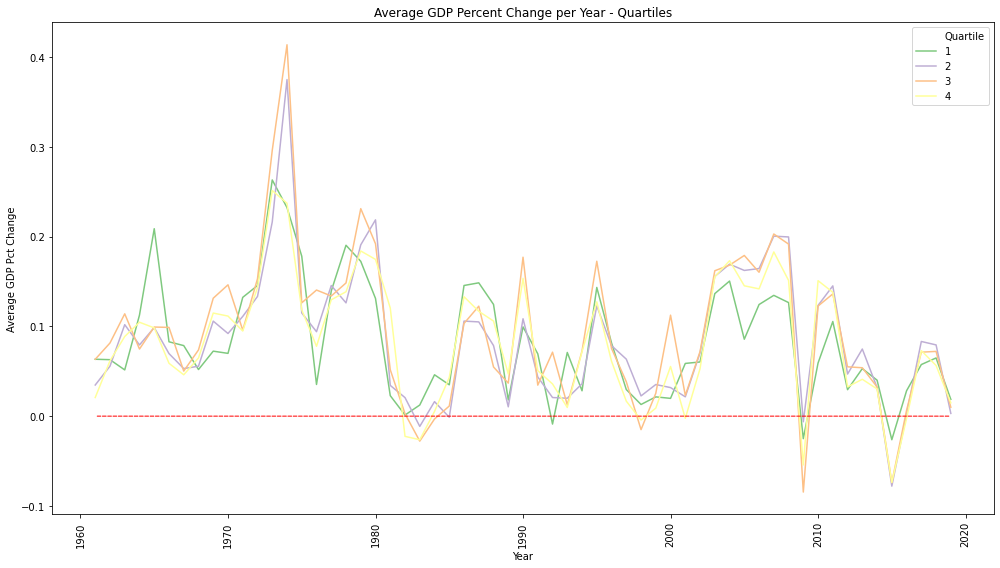

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Initialize figure and size of the plot
plt.figure(figsize=(14,8))

# Seaborn line plot
ax = sns.lineplot(x='Year',y='Average GDP Pct Change',
                  data=pct_change,
                  hue='Quartile',
                  palette='Accent')

# Create a dashed line at zero for comparison
ax.annotate("",
            xy=(1961, 0), xycoords='data',
            xytext=(2019, 0), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            ls='dashed',
                            edgecolor = "red",
                            connectionstyle="arc3, rad=0"),
           )


# Set xtick labels and rotate the x-axis labels
plt.setp(ax.get_xticklabels(), rotation=90)
# Set the title
plt.title('Average GDP Percent Change per Year - Quartiles')

plt.tight_layout()
# Grab the figure
fig = ax.get_figure()
# Save the figure
fig.savefig('Avg GDP pct change')